# **WORKSHEET-1**

# **Exercise 1: Basic Image Processing** **bold text**

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

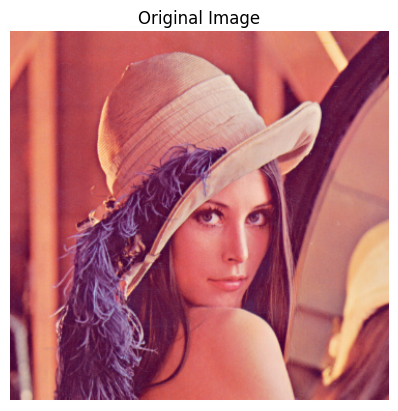

In [33]:
# 1. Read and display the image
image = Image.open("/content/drive/MyDrive/AI/worksheet-1/lenna_image.png")
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


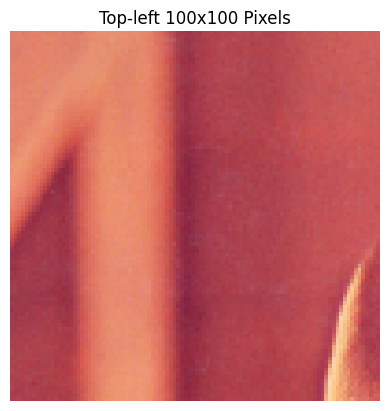

In [34]:
# 2. Display only the top-left corner (100x100 pixels)
image_array = np.array(image)
top_left = image_array[:100, :100]  # Extract top-left 100x100 pixels
plt.imshow(top_left)
plt.title("Top-left 100x100 Pixels")
plt.axis("off")
plt.show()

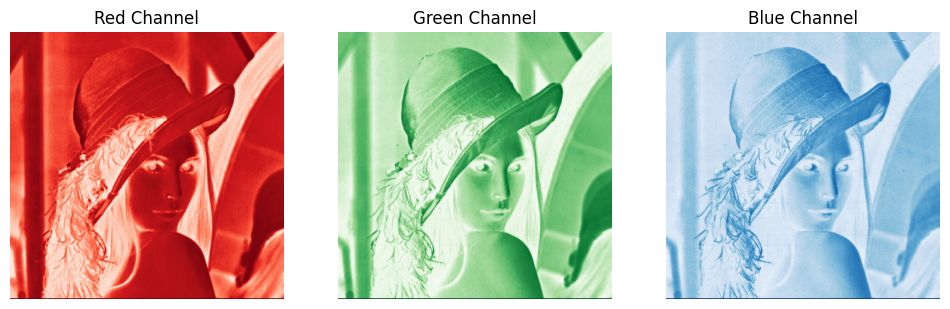

In [35]:
# 3. Show R, G, and B channels separately
r, g, b = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2]

plt.figure(figsize=(12, 4))
for i, (channel, title, cmap) in enumerate(zip([r, g, b], ['Red', 'Green', 'Blue'], ['Reds', 'Greens', 'Blues'])):
    plt.subplot(1, 3, i+1)
    plt.imshow(channel, cmap=cmap)
    plt.title(f"{title} Channel")
    plt.axis("off")

plt.show()

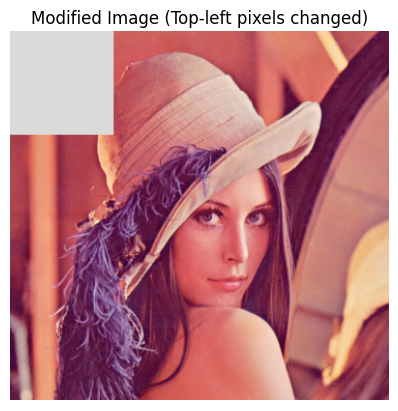

In [36]:
# 4. Modify the top 100x100 pixels to 210 (gray)
image_array[:100, :100] = 210
plt.imshow(image_array)
plt.title("Modified Image (Top-left pixels changed)")
plt.axis("off")
plt.show()

# **Exercise 2: Grayscale and Manipulation**

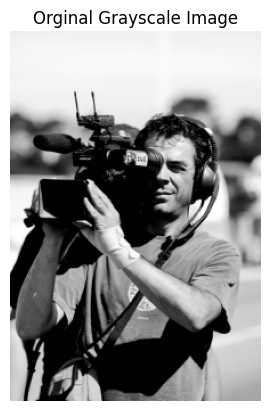

In [38]:
# 1. Load and display a grayscale image
image = Image.open("/content/drive/MyDrive/AI/worksheet-1/camera_man.jpg")
gray_image = image.convert("L")  # Convert to grayscale
plt.imshow(gray_image, cmap="gray")
plt.title("Orginal Grayscale Image")
plt.axis("off")
plt.show()

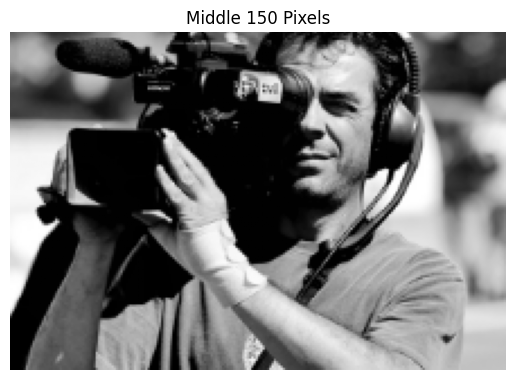

In [39]:
# 2. Extract and display the middle 150 pixels
gray_array = np.array(gray_image)
mid_y, mid_x = gray_array.shape[0] // 2, gray_array.shape[1] // 2
cropped = gray_array[mid_y - 75: mid_y + 75, :]
plt.imshow(cropped, cmap="gray")
plt.title("Middle 150 Pixels")
plt.axis("off")
plt.show()

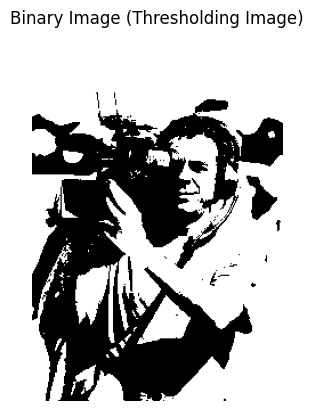

In [41]:
# 3. Apply a threshold (below 100 → 0, above 100 → 255)
binary_image = np.where(gray_array < 100, 0, 255)
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Thresholding Image)")
plt.axis("off")
plt.show()

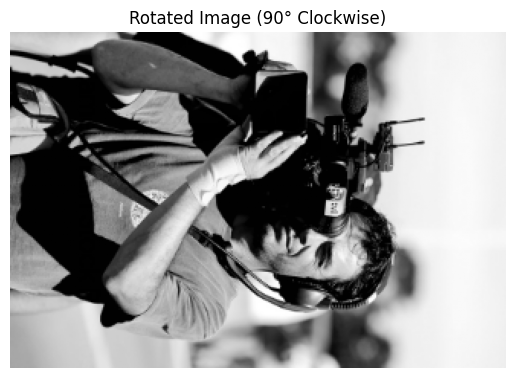

In [42]:
# 4. Rotate the image by 90 degrees clockwise
rotated = np.rot90(gray_array, k=-1)
plt.imshow(rotated, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

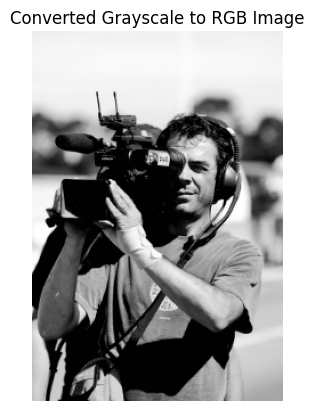

In [44]:
# 5. Convert grayscale image to RGB
rgb_image = np.stack([gray_array]*3, axis=-1)  # Copy grayscale values to R, G, B channels
plt.imshow(rgb_image)
plt.title("Converted Grayscale to RGB Image")
plt.axis("off")
plt.show()

# **Exercise 3: Image Compression using PC**

In [45]:
from sklearn.decomposition import PCA

In [46]:
# 1. Load and preprocess image
image = Image.open("/content/drive/MyDrive/AI/worksheet-1/lenna_image.png")
gray_image = image.convert("L")  # Convert to grayscale
gray_array = np.array(gray_image)
mean_centered = gray_array - np.mean(gray_array)  # Center the data

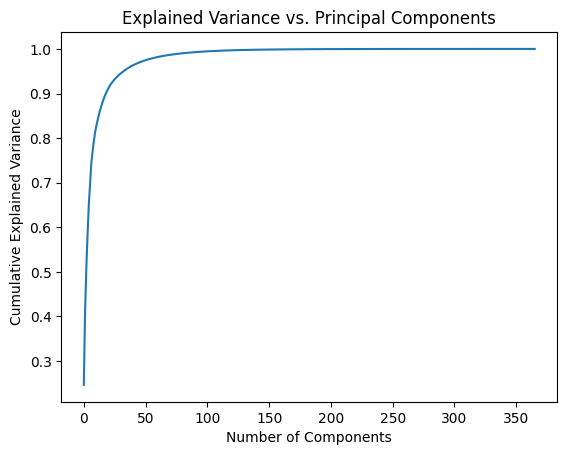

In [48]:
# 2. Compute covariance matrix and eigenvalues
cov_matrix = np.cov(mean_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and select top k components
explained_variance = np.cumsum(eigenvalues[::-1]) / np.sum(eigenvalues)
k_values = [10, 30, 50, 100]  # Different levels of compression

plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Principal Components")
plt.show()

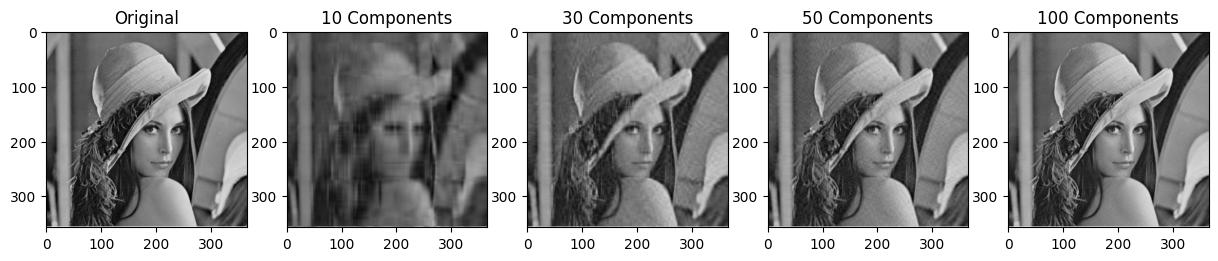

In [49]:
# 3. PCA Reconstruction
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(gray_array, cmap="gray")
axes[0].set_title("Original")

for i, k in enumerate(k_values):
    pca = PCA(n_components=k)
    transformed = pca.fit_transform(gray_array)
    reconstructed = pca.inverse_transform(transformed)
    axes[i+1].imshow(reconstructed, cmap="gray")
    axes[i+1].set_title(f"{k} Components")

plt.show()